In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def is_chinese(cp):
    cp = ord(cp)
    if ((0x4E00 <= cp <= 0x9FFF) or (0x3400 <= cp <= 0x4DBF)
            or (0x20000 <= cp <= 0x2A6DF) or (0x2A700 <= cp <= 0x2B73F)
            or (0x2B740 <= cp <= 0x2B81F) or (0x2B820 <= cp <= 0x2CEAF)
            or (0xF900 <= cp <= 0xFAFF) or (0x2F800 <= cp <= 0x2FA1F)):
        return True
    return False

def all_chinese(string):
    return string and all(is_chinese(chn) for chn in string)

def remove_punct_blank(value):
    result = re.sub('\W+', '', value).replace("_", '')
    return result

assert not all_chinese('')
assert all_chinese('今天天氣很好')
assert not all_chinese('今天天氣ａｓａｓａｓｄ很好ひらがな')
print(remove_punct_blank('今天天氣asdas-.,d123　123 !!wow?，。＄＄＄哈ひらがな哈哈'))

今天天氣asdasd123123wow哈ひらがな哈哈


### Extract text from kaldi-format data

In [3]:
raw_data = open('aishell_text').readlines()
    
print('len:', len(raw_data))
raw_data[-5:]

len: 141600


['BAC009S0916W0491 向一家金融公司贷款一千多万元\n',
 'BAC009S0916W0492 公司承诺贷款本息都由公司负责偿还\n',
 'BAC009S0916W0493 公司却遇到了资金困难\n',
 'BAC009S0916W0494 存在无法如期还贷的风险\n',
 'BAC009S0916W0495 这令被贷款的员工们寝食难安\n']

In [4]:
raw_corpus = [line.strip().split()[-1] for line in raw_data]
raw_corpus[-5:]

['向一家金融公司贷款一千多万元',
 '公司承诺贷款本息都由公司负责偿还',
 '公司却遇到了资金困难',
 '存在无法如期还贷的风险',
 '这令被贷款的员工们寝食难安']

### Filter punctuations, then preserve chinese-only text. 

In [5]:
corpus = []
for i, text in enumerate(raw_corpus, start=1):
    text = remove_punct_blank(text)
    if all_chinese(text):
        corpus.append(text)
    print('%d/%d (%.2f%%)\r' % (i, len(raw_corpus), 100*i/len(raw_corpus)), end='')
print()

print('len:', len(corpus))
corpus[-5:]

141600/141600 (100.00%)
len: 141593


['向一家金融公司贷款一千多万元',
 '公司承诺贷款本息都由公司负责偿还',
 '公司却遇到了资金困难',
 '存在无法如期还贷的风险',
 '这令被贷款的员工们寝食难安']

### Filter overly short utterances

In [6]:
lens = np.array([len(text) for text in corpus])
print('--- Text len. ---')
print('   min: %d' % lens.min())
print('   max: %d' % lens.max())
print('median: %d' % np.median(lens))
print('  mean: %.2f' % lens.mean())
print('   std: %.2f' % lens.std())

--- Text len. ---
   min: 1
   max: 44
median: 14
  mean: 14.41
   std: 4.31


In [8]:
print('--- Accum. count ---')
for i in range(1, lens.max()+1):
    count = lens[lens >= i].shape[0]
    print('len >= %d: %d' % (i, count))

--- Accum. count ---
len >= 1: 141593
len >= 2: 141585
len >= 3: 141561
len >= 4: 141537
len >= 5: 141379
len >= 6: 141175
len >= 7: 140106
len >= 8: 138592
len >= 9: 136436
len >= 10: 124350
len >= 11: 111039
len >= 12: 98448
len >= 13: 85683
len >= 14: 74243
len >= 15: 63733
len >= 16: 53704
len >= 17: 44614
len >= 18: 36371
len >= 19: 28813
len >= 20: 21744
len >= 21: 15161
len >= 22: 9568
len >= 23: 5189
len >= 24: 2374
len >= 25: 527
len >= 26: 242
len >= 27: 118
len >= 28: 59
len >= 29: 36
len >= 30: 26
len >= 31: 21
len >= 32: 16
len >= 33: 13
len >= 34: 10
len >= 35: 9
len >= 36: 7
len >= 37: 6
len >= 38: 4
len >= 39: 3
len >= 40: 1
len >= 41: 1
len >= 42: 1
len >= 43: 1
len >= 44: 1


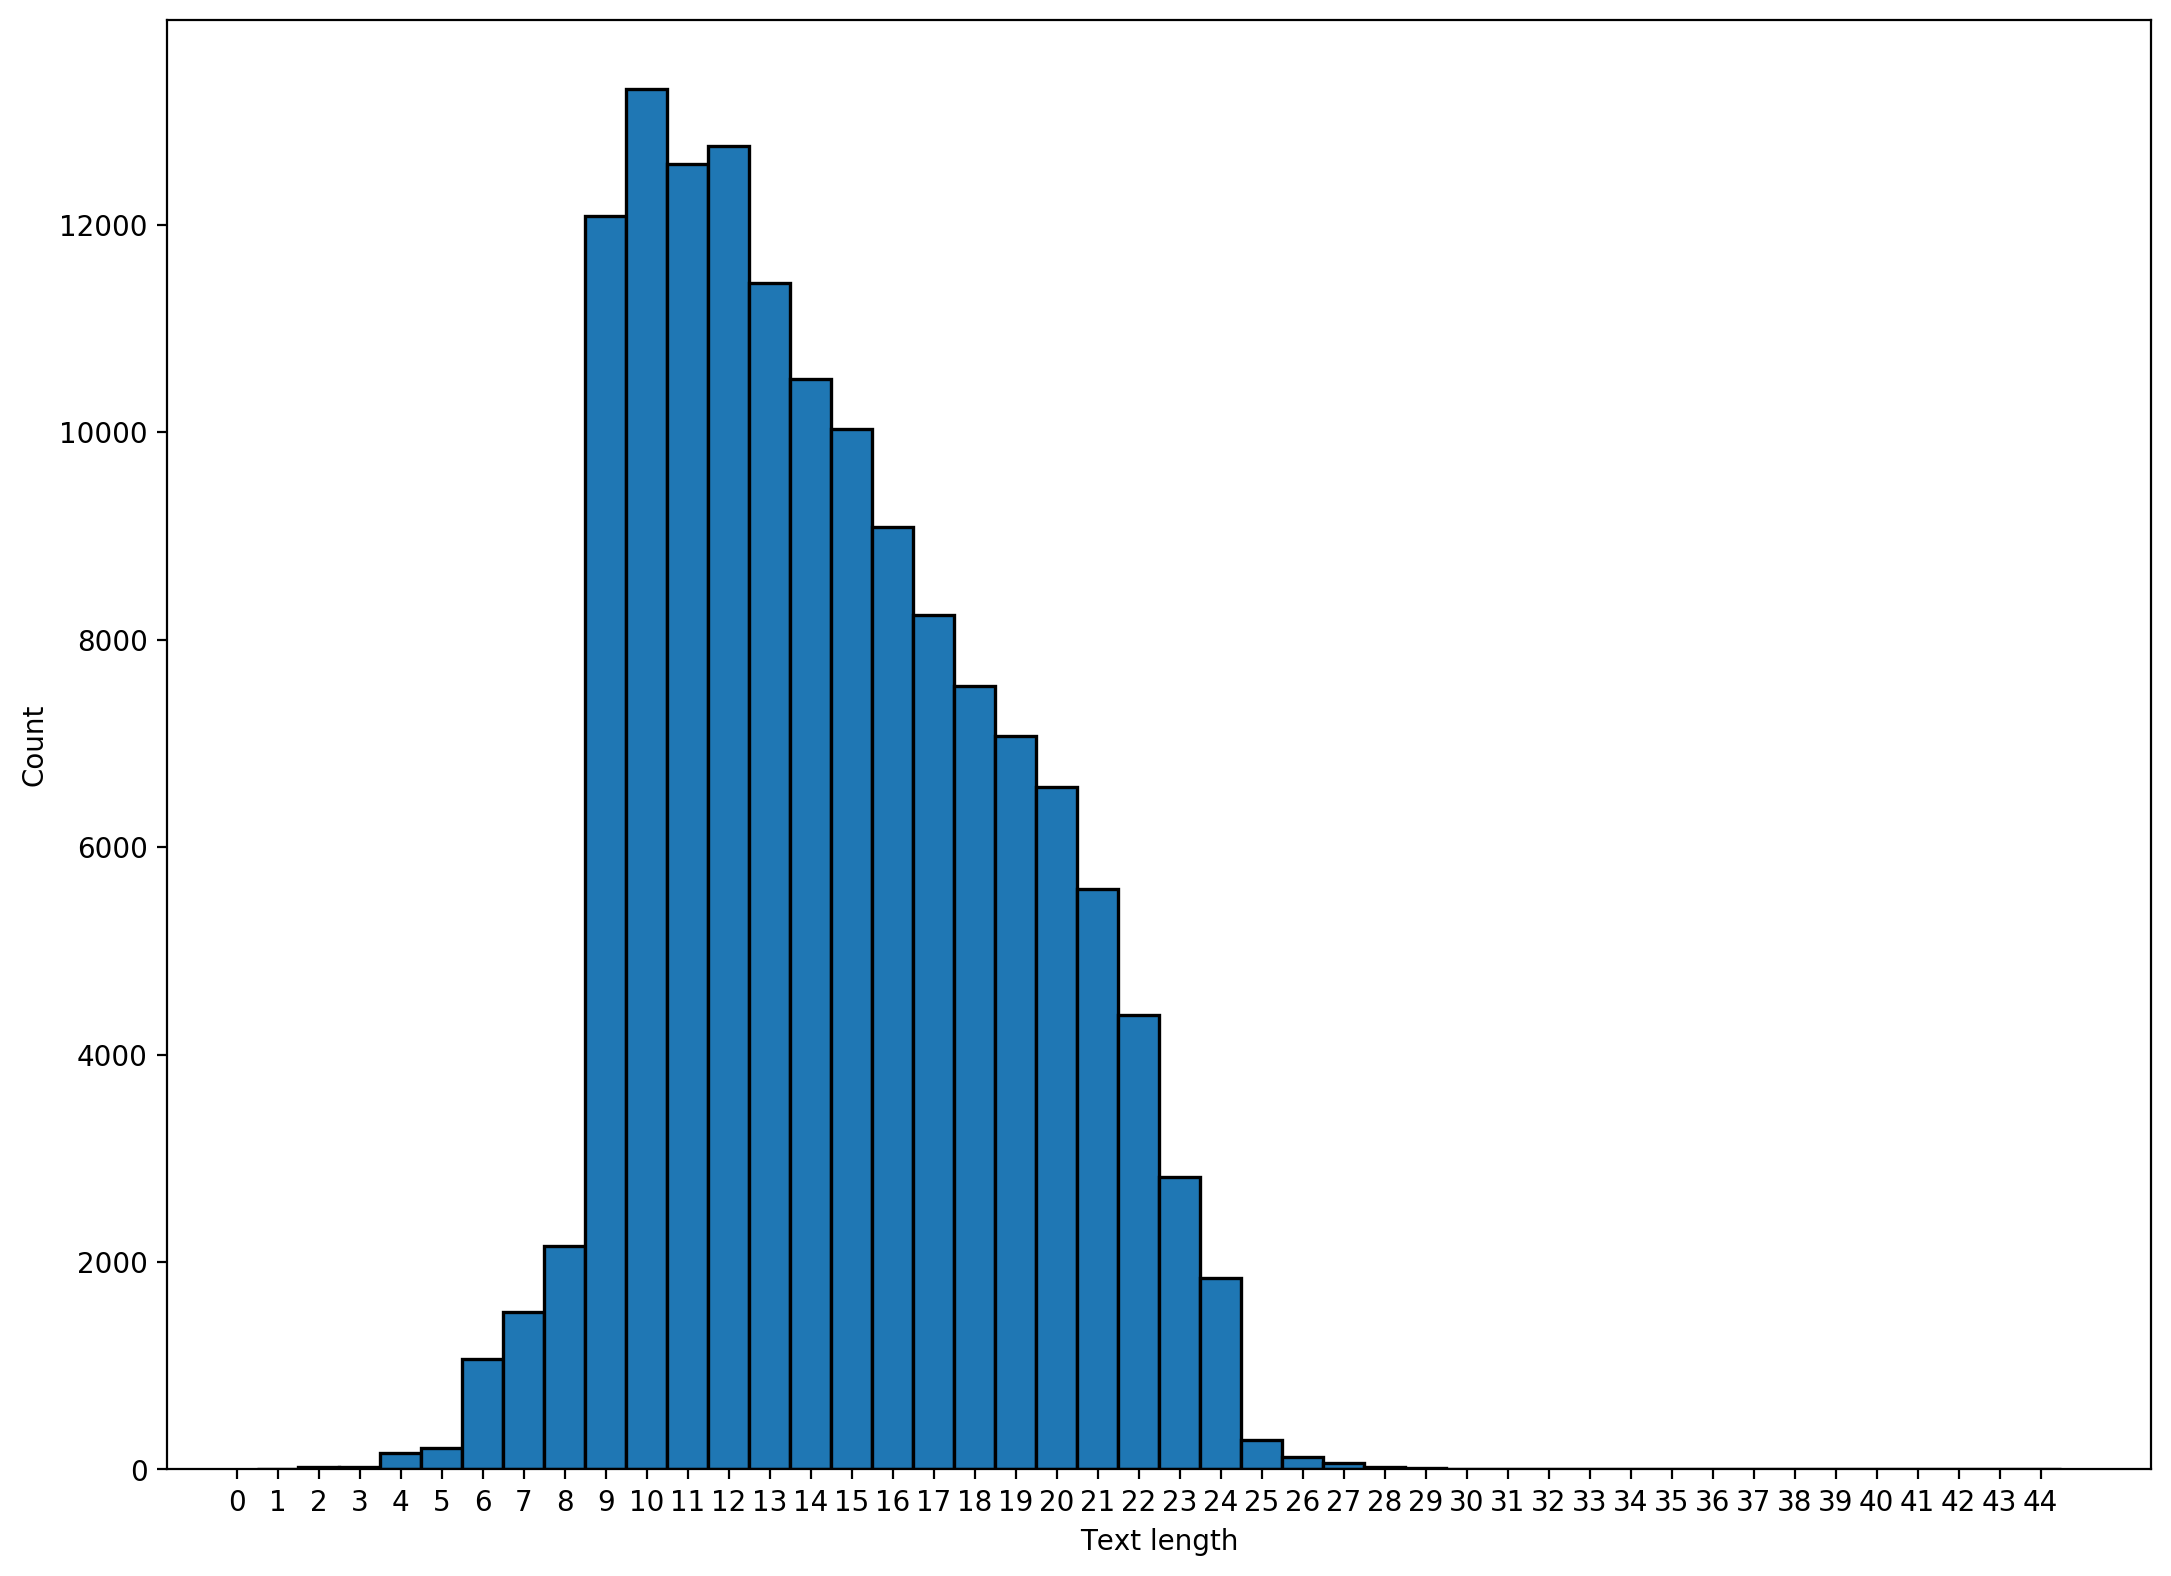

In [10]:
figure(num=None, figsize=(12.8, 9.6), dpi=200, facecolor='w', edgecolor='k')
plt.hist(lens, bins=[i+0.5 for i in range(lens.max()+1)], \
         edgecolor='black', linewidth=1.2)
plt.xticks(np.arange(0,lens.max()+1))
plt.xlabel('Text length')
plt.ylabel('Count')
plt.savefig("aishell-1_EDA.png")
plt.show()